In [1]:
%matplotlib inline
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import seaborn as sns
import warnings
import locale

pd.options.display.float_format = '{:,}'.format

bd1_data_path = "Resources/Realtor_1BD.csv"
bd2_data_path = "Resources/Realtor_2BD.csv"
bd3_data_path = "Resources/Realtor_3BD.csv"
bd4_data_path = "Resources/Realtor_4BD.csv"
bd5_data_path = "Resources/Realtor_5BD.csv"

austin_bnb_path = "Resources/aus_listings.csv"
boston_bnb_path = "Resources/bos_listings.csv"
chicago_bnb_path = "Resources/chi_listings.csv"
sandiego_bnb_path = "Resources/sd_listings.csv"
seattle_bnb_path = "Resources/sea_listings.csv"

bd1_df = pd.read_csv(bd1_data_path)
bd2_df = pd.read_csv(bd2_data_path)
bd3_df = pd.read_csv(bd3_data_path)
bd4_df = pd.read_csv(bd4_data_path)
bd5_df = pd.read_csv(bd5_data_path)

aus_bnb_df = pd.read_csv(austin_bnb_path)
bos_bnb_df = pd.read_csv(boston_bnb_path)
chi_bnb_df = pd.read_csv(chicago_bnb_path)
sd_bnb_df = pd.read_csv(sandiego_bnb_path)
sea_bnb_df = pd.read_csv(seattle_bnb_path)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
colors = {'bd1_df':'lightcoral', 'bd_2':'lightskyblue', 'bd_3':'gold'}

bd1_df = bd1_df[bd1_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd1_df = bd1_df[bd1_df["CBSATitle"].str.contains("MN") == False]
bd1_df = bd1_df[bd1_df["PropertyType"] == "Total"]
bd1_df = bd1_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd1_df = bd1_df.sort_values(by = ["CBSATitle"])
locale.setlocale(locale.LC_ALL,'')

bd2_df = bd2_df[bd2_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd2_df = bd2_df[bd2_df["CBSATitle"].str.contains("MN") == False]
bd2_df = bd2_df[bd2_df["PropertyType"] == "Total"]
bd2_df = bd2_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd2_df = bd2_df.sort_values(by = ["CBSATitle"])

bd3_df = bd3_df[bd3_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd3_df = bd3_df[bd3_df["CBSATitle"].str.contains("MN") == False]
bd3_df = bd3_df[bd3_df["PropertyType"] == "Total"]
bd3_df = bd3_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd3_df = bd3_df.sort_values(by = ["CBSATitle"])

bd4_df = bd4_df[bd4_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd4_df = bd4_df[bd4_df["CBSATitle"].str.contains("MN") == False]
bd4_df = bd4_df[bd4_df["PropertyType"] == "Total"]
bd4_df = bd4_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd4_df = bd4_df.sort_values(by = ["CBSATitle"])

bd5_df = bd5_df[bd5_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd5_df = bd5_df[bd5_df["CBSATitle"].str.contains("MN") == False]
bd5_df = bd5_df[bd5_df["PropertyType"] == "Total"]
bd5_df = bd5_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd5_df = bd5_df.sort_values(by = ["CBSATitle"])

In [3]:
# Cut the infomation we need down, drop the useless one
aus_bnb_df = aus_bnb_df[["room_type","bedrooms","price"]]
aus_bnb_df = aus_bnb_df.dropna()
aus_bnb_df = aus_bnb_df[aus_bnb_df["room_type"] == "Entire home/apt"]
aus_bnb_df["price"] = aus_bnb_df["price"].str.replace(",","")
aus_bnb_df["price"] = aus_bnb_df["price"].str.replace("$","")
aus_bnb_df["price"] = aus_bnb_df["price"].astype(float)

bos_bnb_df = bos_bnb_df[["room_type","bedrooms","price"]]
bos_bnb_df = bos_bnb_df.dropna()
bos_bnb_df = bos_bnb_df[bos_bnb_df["room_type"] == "Entire home/apt"]
bos_bnb_df["price"] = bos_bnb_df["price"].str.replace(",","")
bos_bnb_df["price"] = bos_bnb_df["price"].str.replace("$","")
bos_bnb_df["price"] = bos_bnb_df["price"].astype(float)

chi_bnb_df = chi_bnb_df[["room_type","bedrooms","price"]]
chi_bnb_df = chi_bnb_df.dropna()
chi_bnb_df = chi_bnb_df[chi_bnb_df["room_type"] == "Entire home/apt"]
chi_bnb_df["price"] = chi_bnb_df["price"].str.replace(",","")
chi_bnb_df["price"] = chi_bnb_df["price"].str.replace("$","")
chi_bnb_df["price"] = chi_bnb_df["price"].astype(float)

sd_bnb_df = sd_bnb_df[["room_type","bedrooms","price"]]
sd_bnb_df = sd_bnb_df.dropna()
sd_bnb_df = sd_bnb_df[sd_bnb_df["room_type"] == "Entire home/apt"]
sd_bnb_df["price"] = sd_bnb_df["price"].str.replace(",","")
sd_bnb_df["price"] = sd_bnb_df["price"].str.replace("$","")
sd_bnb_df["price"] = sd_bnb_df["price"].astype(float)

sea_bnb_df = sea_bnb_df[["room_type","bedrooms","price"]]
sea_bnb_df = sea_bnb_df.dropna()
sea_bnb_df = sea_bnb_df[sea_bnb_df["room_type"] == "Entire home/apt"]
sea_bnb_df["price"] = sea_bnb_df["price"].str.replace(",","")
sea_bnb_df["price"] = sea_bnb_df["price"].str.replace("$","")
sea_bnb_df["price"] = sea_bnb_df["price"].astype(float)

In [4]:
# Grab the average estimate occupancy from the website below
# http://insideairbnb.com/get-the-data.html for each city
# estimate set of guests per year
aus_occ = 0.221 * 365
bos_occ = 0.297 * 365
chi_occ = 0.382 * 365
sd_occ = 0.278 * 365
sea_occ = 0.344 *365

In [5]:
# assume that we use "reviews per month" as our possible guest
# 1 bed room

aus_bnb_bd1 = aus_bnb_df[aus_bnb_df["bedrooms"] == 1]
bos_bnb_bd1 = bos_bnb_df[bos_bnb_df["bedrooms"] == 1]
chi_bnb_bd1 = chi_bnb_df[chi_bnb_df["bedrooms"] == 1]
sd_bnb_bd1 = sd_bnb_df[sd_bnb_df["bedrooms"] == 1]
sea_bnb_bd1 = sea_bnb_df[sea_bnb_df["bedrooms"] == 1]

aus_bd1_income = aus_bnb_bd1["price"].mean()* aus_occ
bos_bd1_income = bos_bnb_bd1["price"].mean()* bos_occ
chi_bd1_income = chi_bnb_bd1["price"].mean()* chi_occ
sd_bd1_income = sd_bnb_bd1["price"].mean()* sd_occ
sea_bd1_income = sea_bnb_bd1["price"].mean()* sea_occ

city_bd1_income = [aus_bd1_income,bos_bd1_income,chi_bd1_income,sd_bd1_income,sea_bd1_income]
city_bd1_income

[13901.778548387098,
 21889.005175438597,
 17881.57405424697,
 15149.183820754717,
 18139.668722527473]

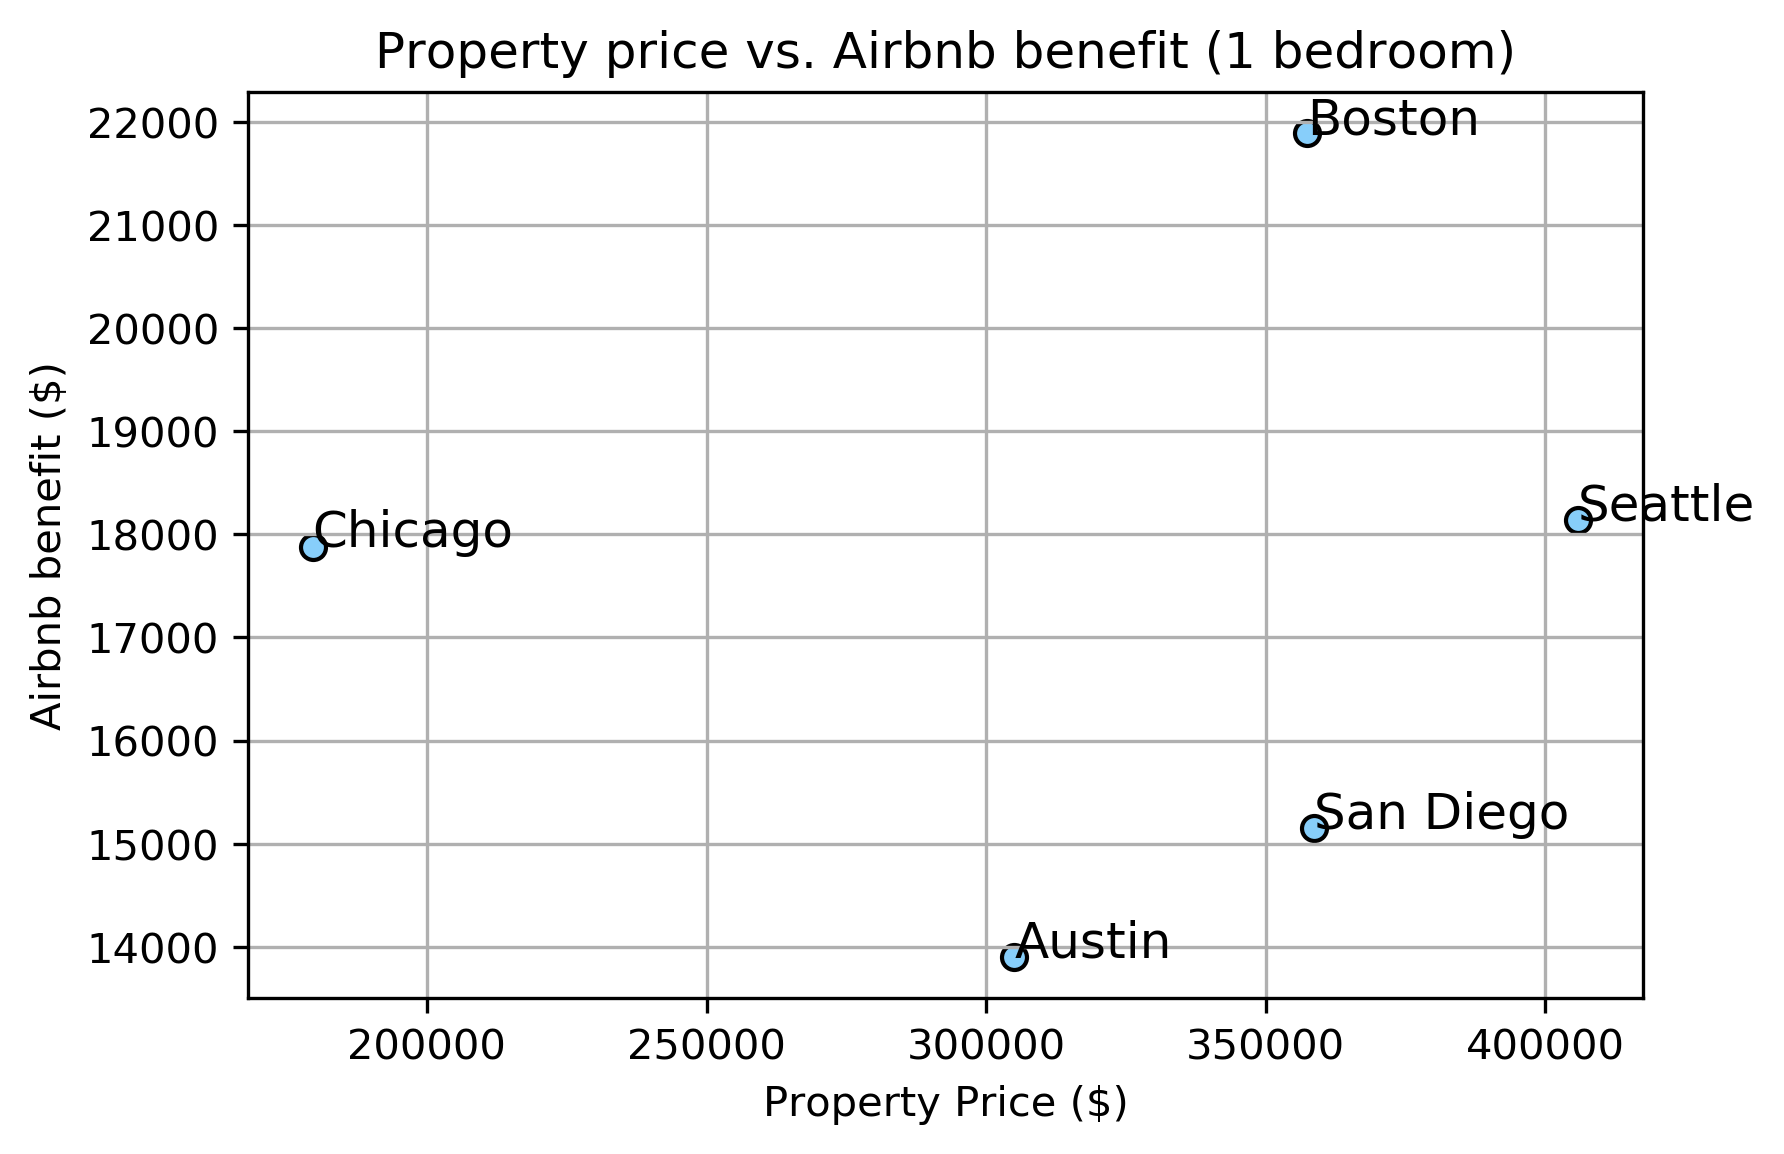

In [6]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd1_df["MedianListingPrice "].values
y_axis = city_bd1_income

plt.figure(dpi=300)

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    pd.options.display.float_format = '{:,}'.format
    plt.scatter(x, y, marker="o", facecolors = "lightskyblue", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (1 bedroom)")
plt.xlabel("Property Price ($)")
plt.ylabel("Airbnb benefit ($)")
plt.savefig("Images/1_bedroom_plot.png")
plt.show()

In [7]:
# assume that we use "reviews per month" as our possible guest
# 2 bed room

aus_bnb_bd2 = aus_bnb_df[aus_bnb_df["bedrooms"] == 2]
bos_bnb_bd2 = bos_bnb_df[bos_bnb_df["bedrooms"] == 2]
chi_bnb_bd2 = chi_bnb_df[chi_bnb_df["bedrooms"] == 2]
sd_bnb_bd2 = sd_bnb_df[sd_bnb_df["bedrooms"] == 2]
sea_bnb_bd2 = sea_bnb_df[sea_bnb_df["bedrooms"] == 2]

aus_bd2_income = aus_bnb_bd2["price"].mean()* aus_occ
bos_bd2_income = bos_bnb_bd2["price"].mean()* bos_occ
chi_bd2_income = chi_bnb_bd2["price"].mean()* chi_occ
sd_bd2_income = sd_bnb_bd2["price"].mean()* sd_occ
sea_bd2_income = sea_bnb_bd2["price"].mean()* sea_occ

city_bd2_income = [aus_bd2_income,bos_bd2_income,chi_bd2_income,sd_bd2_income,sea_bd2_income]
city_bd2_income

[21264.89422423775,
 29018.548601694918,
 24256.000802577622,
 24080.154521739136,
 23590.050991787743]

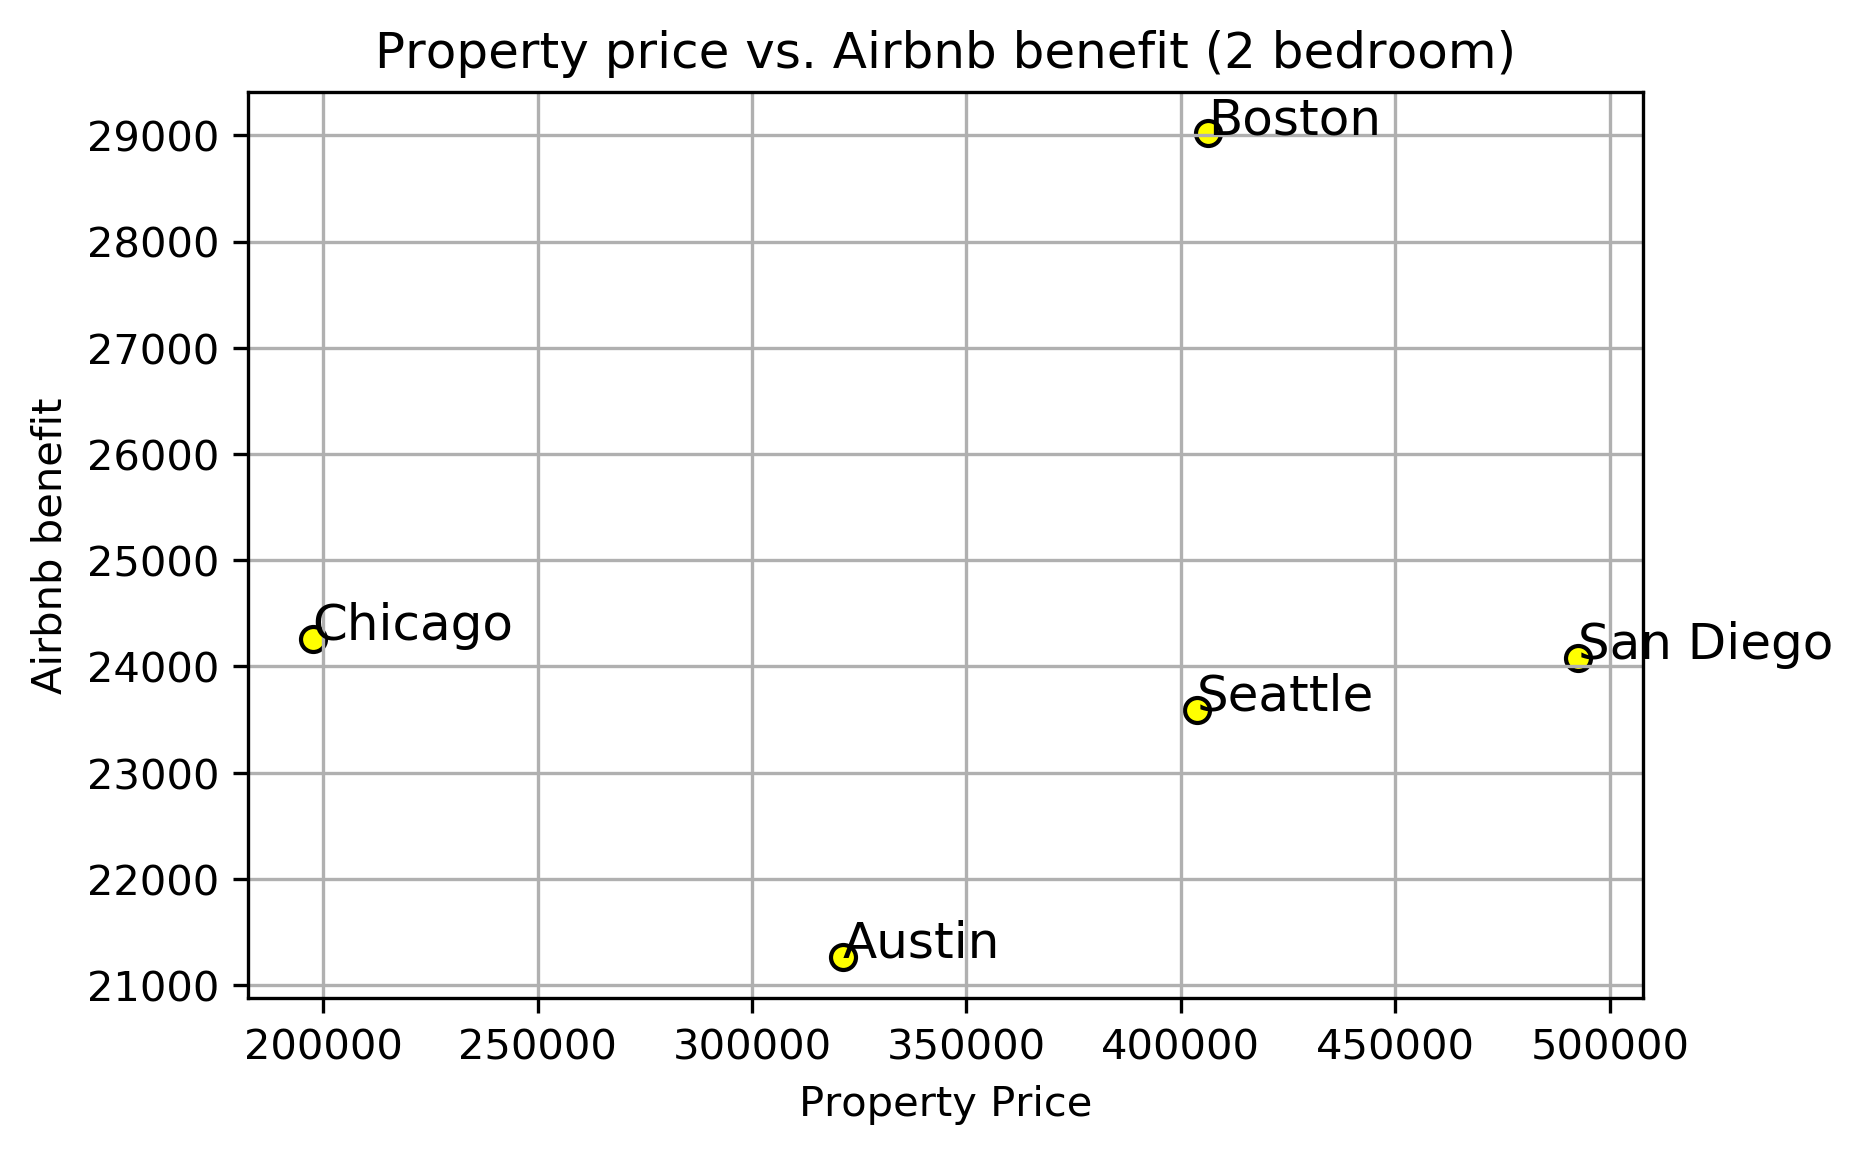

In [8]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd2_df["MedianListingPrice "].values
y_axis = city_bd2_income

plt.figure(dpi=300)

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="yellow", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (2 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/2_bedroom_plot.png")
plt.show()

In [9]:
# assume that we use "reviews per month" as our possible guest
# 3 bed room

aus_bnb_bd3 = aus_bnb_df[aus_bnb_df["bedrooms"] == 3]
bos_bnb_bd3 = bos_bnb_df[bos_bnb_df["bedrooms"] == 3]
chi_bnb_bd3 = chi_bnb_df[chi_bnb_df["bedrooms"] == 3]
sd_bnb_bd3 = sd_bnb_df[sd_bnb_df["bedrooms"] == 3]
sea_bnb_bd3 = sea_bnb_df[sea_bnb_df["bedrooms"] == 3]

aus_bd3_income = aus_bnb_bd3["price"].mean()* aus_occ
bos_bd3_income = bos_bnb_bd3["price"].mean()* bos_occ
chi_bd3_income = chi_bnb_bd3["price"].mean()* chi_occ
sd_bd3_income = sd_bnb_bd3["price"].mean()* sd_occ
sea_bd3_income = sea_bnb_bd3["price"].mean()* sea_occ

city_bd3_income = [aus_bd3_income,bos_bd3_income,chi_bd3_income,sd_bd3_income,sea_bd3_income]
city_bd3_income

[34517.81157798165,
 37540.39939534883,
 33718.90805452293,
 38519.9948334567,
 32533.266378066375]

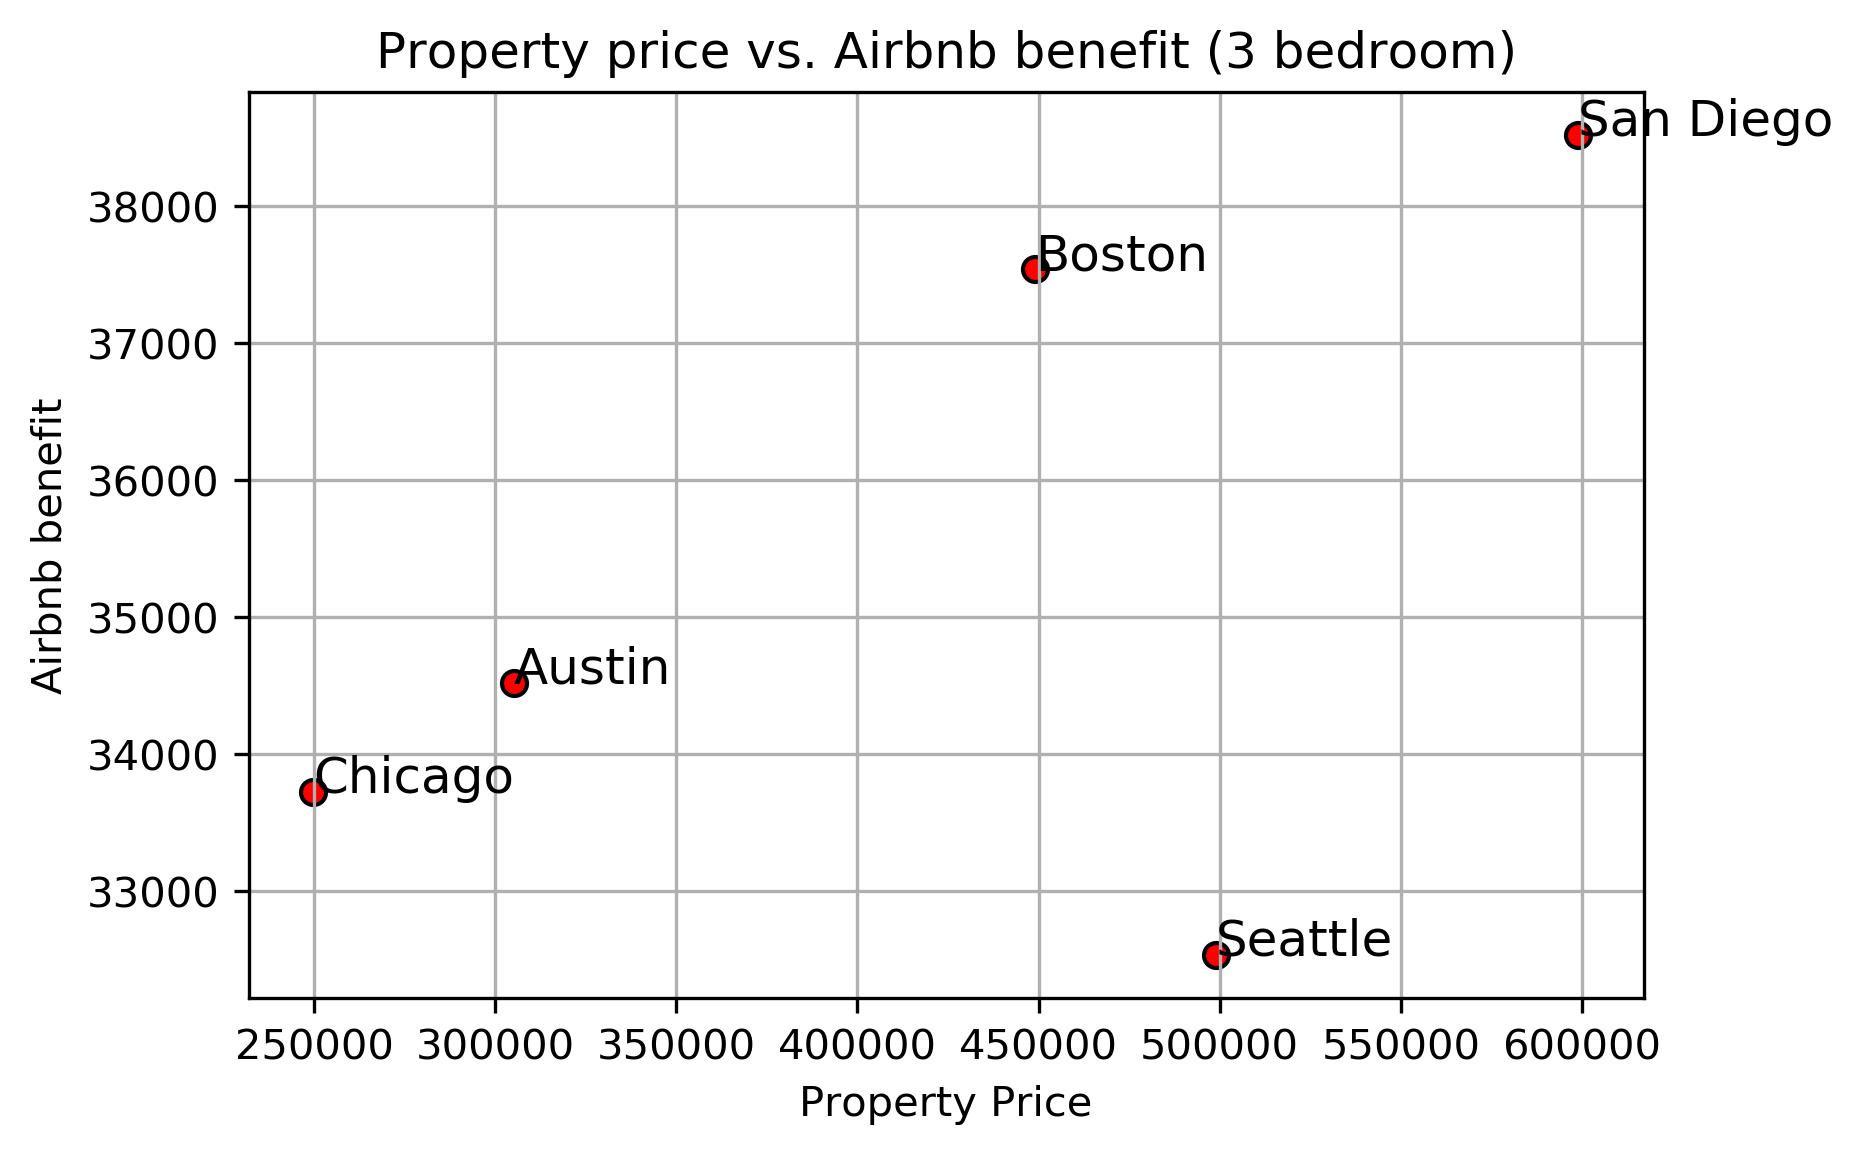

In [10]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd3_df["MedianListingPrice "].values
y_axis = city_bd3_income

plt.figure(dpi=300)

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (3 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/3_bedroom_plot.png")
plt.show()

In [11]:
# assume that we use "reviews per month" as our possible guest
# 4 bed room

aus_bnb_bd4 = aus_bnb_df[aus_bnb_df["bedrooms"] == 4]
bos_bnb_bd4 = bos_bnb_df[bos_bnb_df["bedrooms"] == 4]
chi_bnb_bd4 = chi_bnb_df[chi_bnb_df["bedrooms"] == 4]
sd_bnb_bd4 = sd_bnb_df[sd_bnb_df["bedrooms"] == 4]
sea_bnb_bd4 = sea_bnb_df[sea_bnb_df["bedrooms"] == 4]

aus_bd4_income = aus_bnb_bd4["price"].mean()* aus_occ
bos_bd4_income = bos_bnb_bd4["price"].mean()* bos_occ
chi_bd4_income = chi_bnb_bd4["price"].mean()* chi_occ
sd_bd4_income = sd_bnb_bd4["price"].mean()* sd_occ
sea_bd4_income = sea_bnb_bd4["price"].mean()* sea_occ

city_bd4_income = [aus_bd4_income,bos_bd4_income,chi_bd4_income,sd_bd4_income,sea_bd4_income]
city_bd4_income

[64095.81148148149,
 72799.37775,
 49218.19668085107,
 55705.86143953936,
 40874.159999999996]

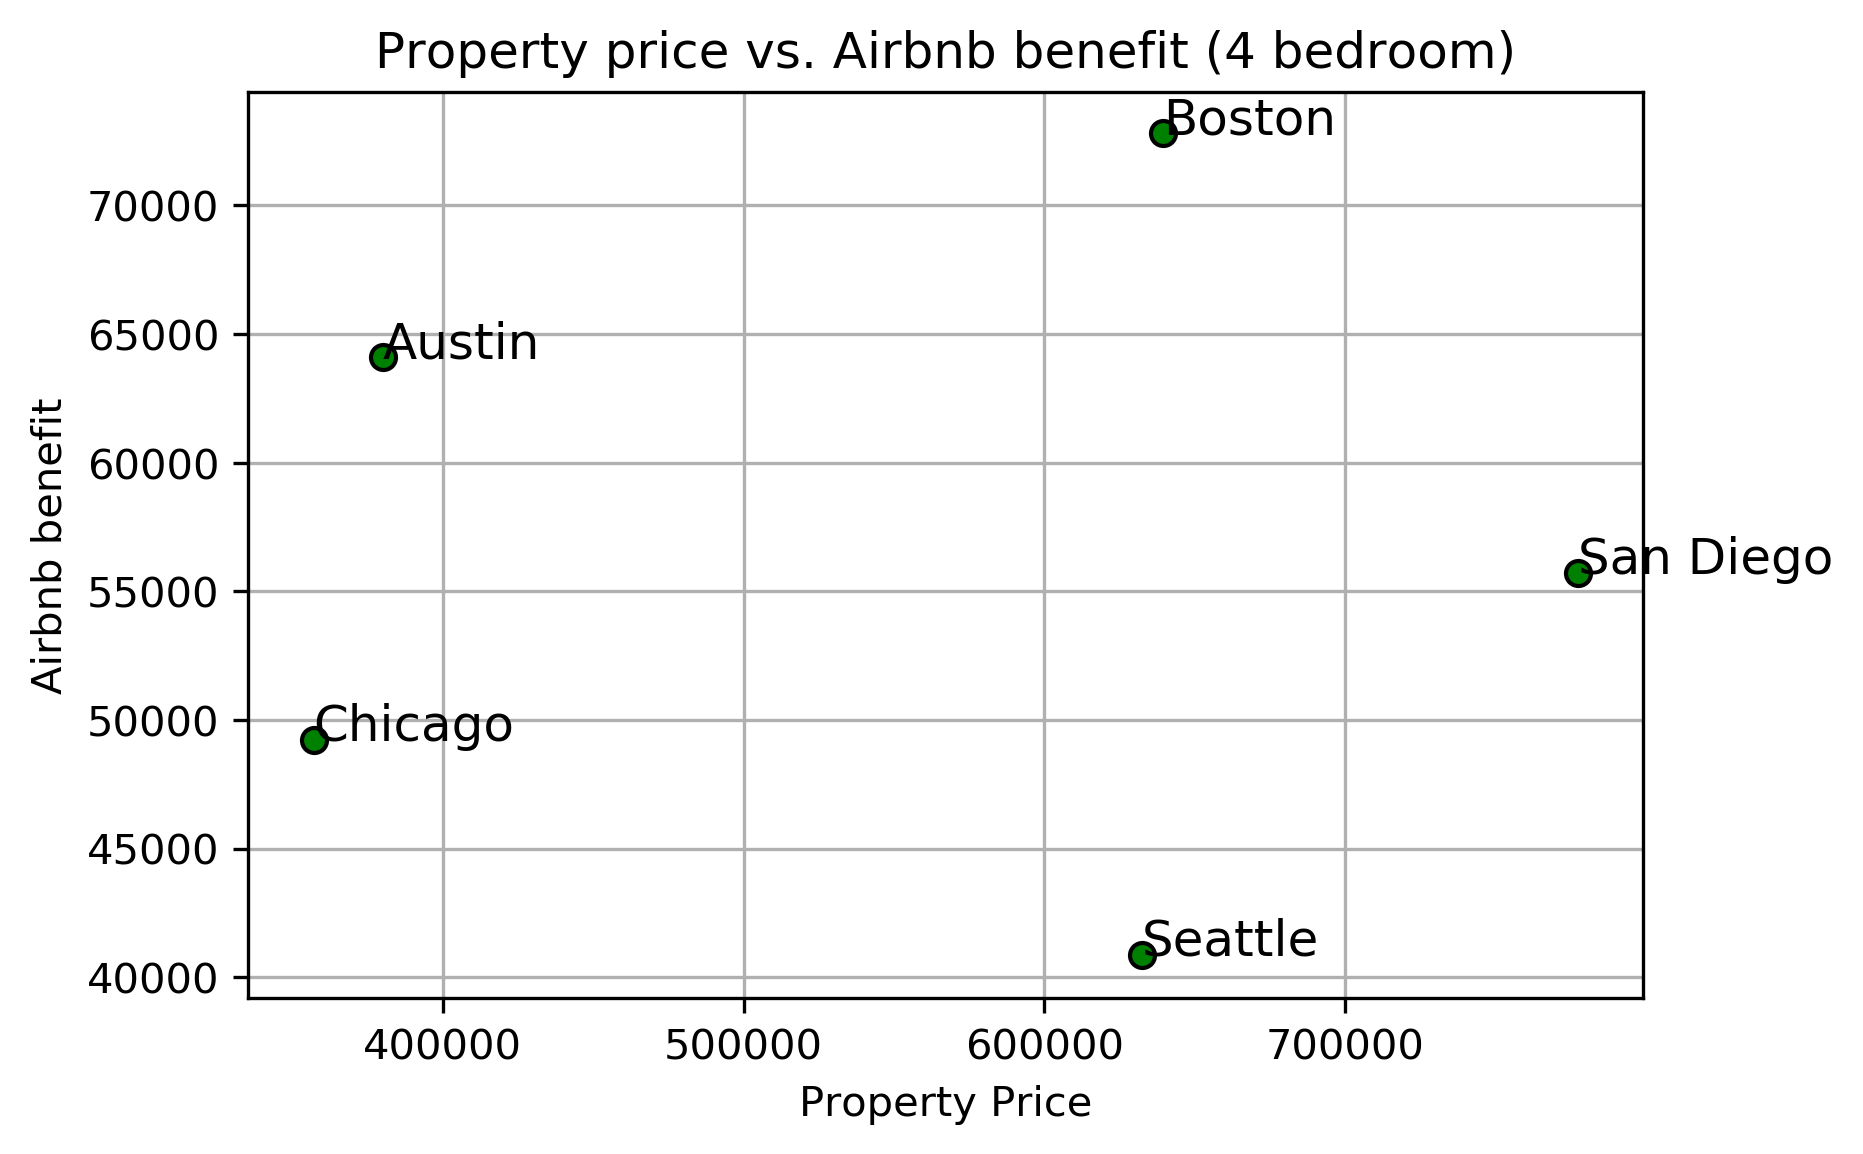

In [12]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd4_df["MedianListingPrice "].values
y_axis = city_bd4_income

plt.figure(dpi=300)

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="green", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (4 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/4_bedroom_plot.png")
plt.show()

In [13]:
# assume that we use "reviews per month" as our possible guest
# 5 bed room

aus_bnb_bd5 = aus_bnb_df[aus_bnb_df["bedrooms"] == 5]
bos_bnb_bd5 = bos_bnb_df[bos_bnb_df["bedrooms"] == 5]
chi_bnb_bd5 = chi_bnb_df[chi_bnb_df["bedrooms"] == 5]
sd_bnb_bd5 = sd_bnb_df[sd_bnb_df["bedrooms"] == 5]
sea_bnb_bd5 = sea_bnb_df[sea_bnb_df["bedrooms"] == 5]

aus_bd5_income = aus_bnb_bd5["price"].mean()* aus_occ
bos_bd5_income = bos_bnb_bd5["price"].mean()* bos_occ
chi_bd5_income = chi_bnb_bd5["price"].mean()* chi_occ
sd_bd5_income = sd_bnb_bd5["price"].mean()* sd_occ
sea_bd5_income = sea_bnb_bd5["price"].mean()* sea_occ

city_bd5_income = [aus_bd5_income,bos_bd5_income,chi_bd5_income,sd_bd5_income,sea_bd5_income]
city_bd5_income

[98056.07798165138,
 74464.38,
 63277.25546875,
 87185.66107344633,
 64370.977368421045]

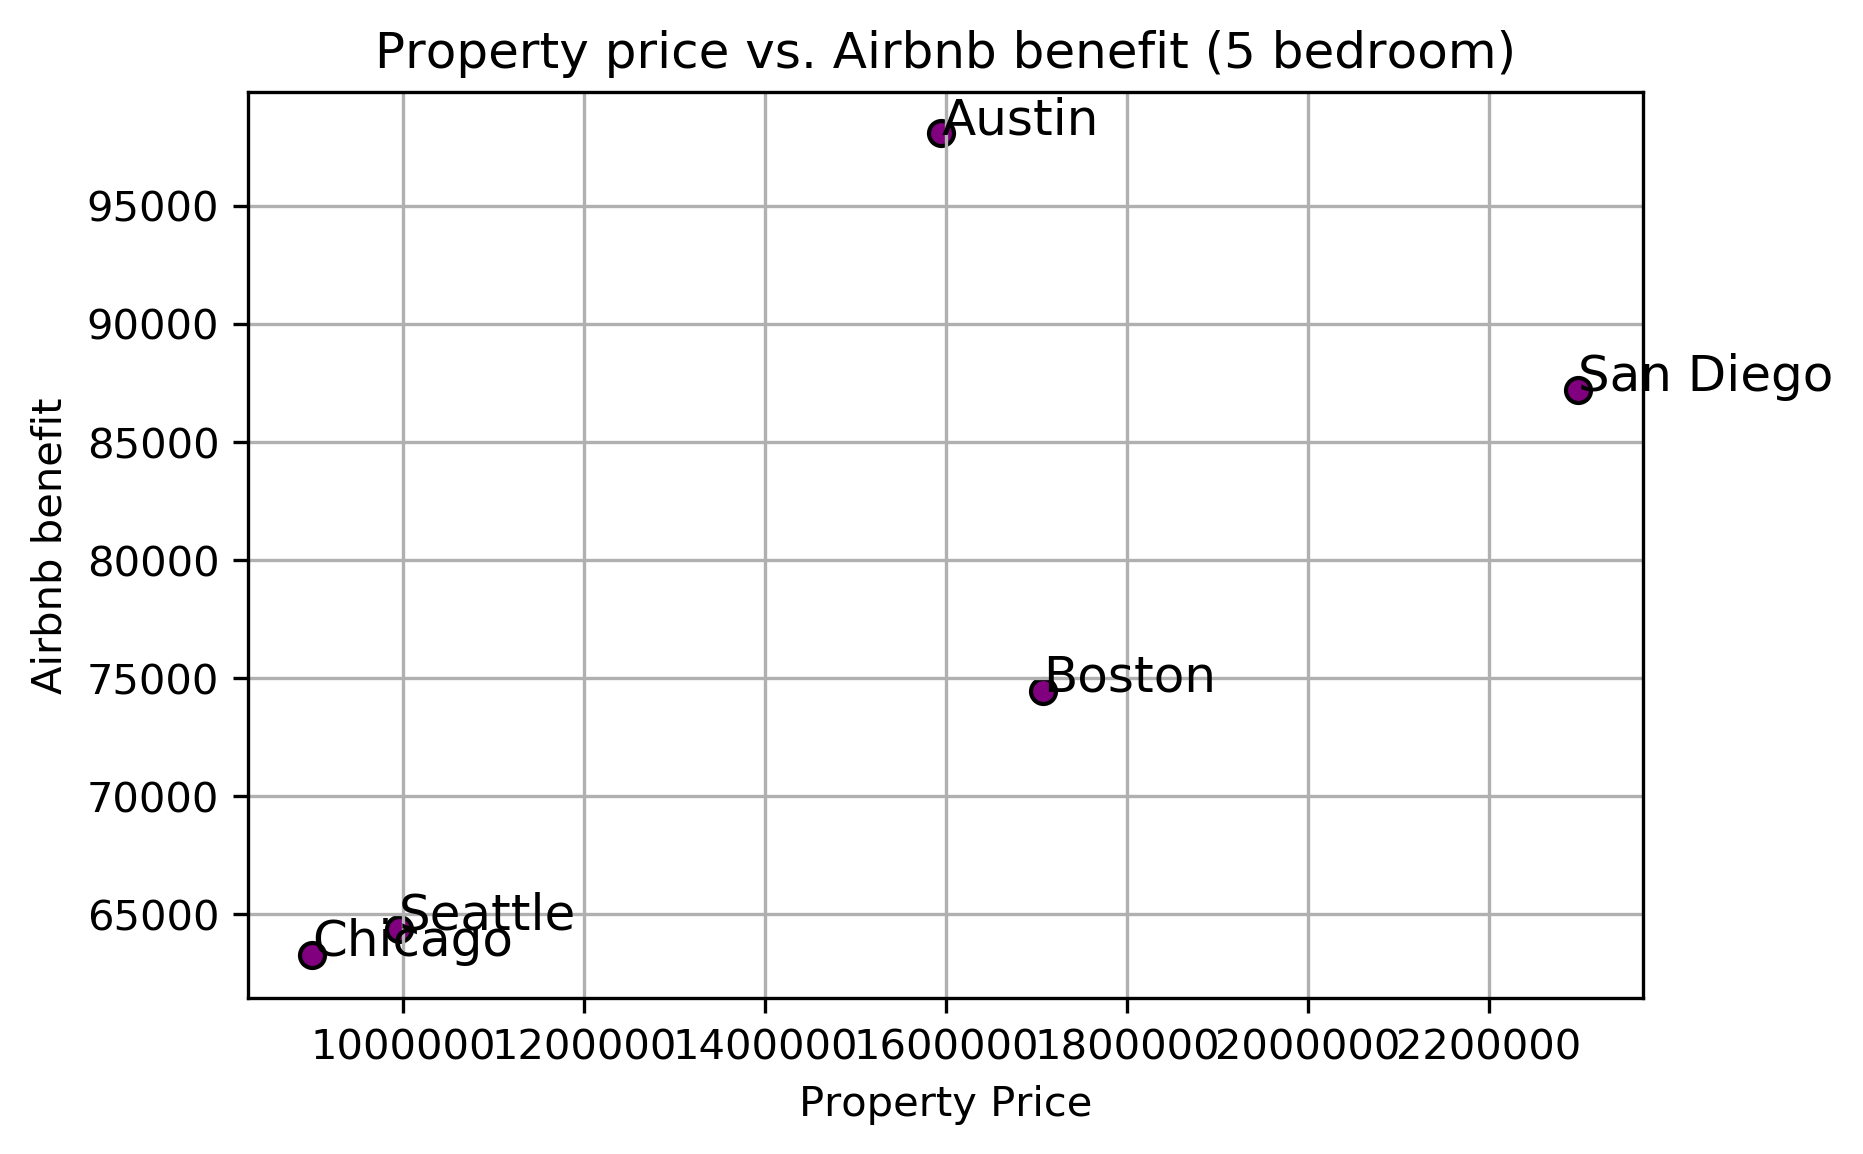

In [14]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd5_df["MedianListingPrice "].values
y_axis = city_bd5_income

plt.figure(dpi=300)

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="purple", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (5 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/5_bedroom_bar.png")
plt.show()